1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that they are two procedure yields to same result
* What percent of the total variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [59]:
import numpy as np
import random
from scipy import linalg as la
from matplotlib import pyplot as plt

In [25]:
N = 1000

# 1.
mu_1 = 0
std_1 = 1
x_1 = np.random.normal(mu_1,std_1,N)

# 2.
mu_2 = 0
std_2 = 3
x_2 = x_1 + np.random.normal(mu_2,std_2,N)

# 3.
x_3 = 2*x_1+x_2

# Create the dataset
dataset = np.zeros((N,3))
dataset[:,0] = x_1
dataset[:,1] = x_2
dataset[:,2] = x_3

cov_mat = np.cov(dataset.T)

eigval_PCA, eigvec_PCA = np.linalg.eig(cov_mat)
#print("\n The Eigenvalues of my dataset: \n",eigval)
#print("\n The Eigenvectors of my dataset: \n",eigvec)

U, spectrum, Vt = la.svd(dataset)

eigval_SVD = (spectrum**2)/(N-1)
#print(eigval_PCA)
#print(eigval_SVD)

weight_eigval = eigval_PCA/sum(eigval_PCA)
print(weight_eigval)

[ 9.39175640e-01 -8.16877019e-18  6.08243599e-02]


The first component is the most important since the 92%/93% of the total variability is described by this variable, and this is right, because it's the only component that does not depends on the others. The second component describe the 7% of the total variabily, because it's values are desbribed by the first variable. Since the last component is a linear combinantions of the last two, it does not bring any kind of information, it's a noisy feature, so we can remove it

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


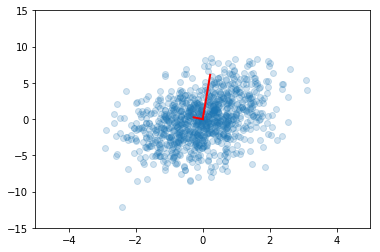

In [52]:
# Dataset without the third feature
dataset_reduce = dataset[:,:2]

eigval_reduce, eigvec_reduce = np.linalg.eig(np.dot(dataset_reduce, dataset_reduce.T)/(N-1))

plt.scatter(dataset_reduce[:,0], dataset_reduce[:,1], alpha=0.2)
scale_factor = 8
for li, vi in zip(eigval_reduce, eigvec_reduce.T):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
plt.axis([-5,5,-15,15]);


2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [63]:
dataset = np.zeros((N,13))
dataset[:,0] = x_1
dataset[:,1] = x_2
dataset[:,2] = x_3

mu = 0
std = std_1/50
for i in range(10):
    dataset[:,3+i] = np.random.normal(mu,std+random.randint(0,1),N)
    

cov_mat = np.cov(dataset.T)
eigval_PCA, eigvec_PCA = np.linalg.eig(cov_mat)
weight_eigval = eigval_PCA/sum(eigval_PCA)
print(weight_eigval)
    

[ 8.53450281e-01  5.55791107e-02  3.21719634e-02  2.95402449e-02
  2.91739968e-02 -1.16520673e-17  1.38377911e-05  1.05751624e-05
  1.10207611e-05  1.14240482e-05  1.30368633e-05  1.20992070e-05
  1.24088947e-05]


3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset